In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 1: Load the dataset
covid_df = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Step 2: Create a 'total_cases' column by summing all date columns
covid_df["total_cases"] = covid_df.iloc[:, 4:].sum(axis=1)

# Step 3: Convert to a GeoDataFrame
covid_gdf = gpd.GeoDataFrame(
    covid_df,
    geometry=[Point(xy) for xy in zip(covid_df["Long"], covid_df["Lat"])],
    crs="EPSG:4326"  # WGS84 projection
)

# Step 4: Aggregate total cases by country
covid_gdf_country = covid_gdf.dissolve(by="Country/Region", aggfunc={"total_cases": "sum"}).reset_index()

# Step 5: Plot the data
fig, ax = plt.subplots(figsize=(15, 10))
covid_gdf_country.plot(
    ax=ax,
    column="total_cases",  # Color by total cases
    cmap="Reds",           # Red color scale
    legend=True,
    legend_kwds={"label": "Total Confirmed Cases"},
    alpha=0.7,
    edgecolor="black"
)

plt.title("Total COVID-19 Confirmed Cases by Country")
plt.show()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
# Step 1: Load the dataset
covid_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
# Step 2: Create a 'total_cases' column by summing all date columns
covid_df["total_cases"] = covid_df.iloc[:, 4:].sum(axis=1)
covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,total_cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,259976938
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,371125308
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,365483300
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,49095050
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,120050406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,825087392
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,428924
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,15758870
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,391907366


In [ ]:
# Step 3: Convert to a GeoDataFrame
covid_gdf = gpd.GeoDataFrame(
    covid_df,
    geometry=[Point(xy) for xy in zip(covid_df["Long"], covid_df["Lat"])],
    crs="EPSG:4326"  # WGS84 projection
)
covid_gdf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,total_cases,geometry
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209358,209362,209369,209390,209406,209436,209451,209451,259976938,POINT (67.70995 33.93911)
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334427,334427,334427,334427,334427,334443,334457,371125308,POINT (20.1683 41.1533)
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271463,271469,271469,271477,271477,271490,271494,271496,365483300,POINT (1.6596 28.0339)
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47890,47890,49095050,POINT (1.5218 42.5063)
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105288,105288,120050406,POINT (17.8739 -11.2027)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,825087392,POINT (35.2332 31.9522)
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,428924,POINT (116.4074 39.9042)
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,15758870,POINT (48.51639 15.55273)
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343079,343079,343079,343135,343135,343135,343135,343135,391907366,POINT (27.84933 -13.1339)


In [ ]:

# Step 4: Aggregate total cases by country
covid_gdf_country = covid_gdf.dissolve(by="Country/Region", aggfunc={"total_cases": "sum"}).reset_index()
covid_gdf_country

,Country/Region,geometry,total_cases
0,Afghanistan,POINT (67.70995 33.93911),259976938
1,Albania,POINT (20.1683 41.1533),371125308
2,Algeria,POINT (1.6596 28.0339),365483300
3,Andorra,POINT (1.5218 42.5063),49095050
4,Angola,POINT (17.8739 -11.2027),120050406
...,...,...,...
196,West Bank and Gaza,POINT (35.2332 31.9522),825087392
197,Winter Olympics 2022,POINT (116.4074 39.9042),428924
198,Yemen,POINT (48.51639 15.55273),15758870
199,Zambia,POINT (27.84933 -13.1339),391907366


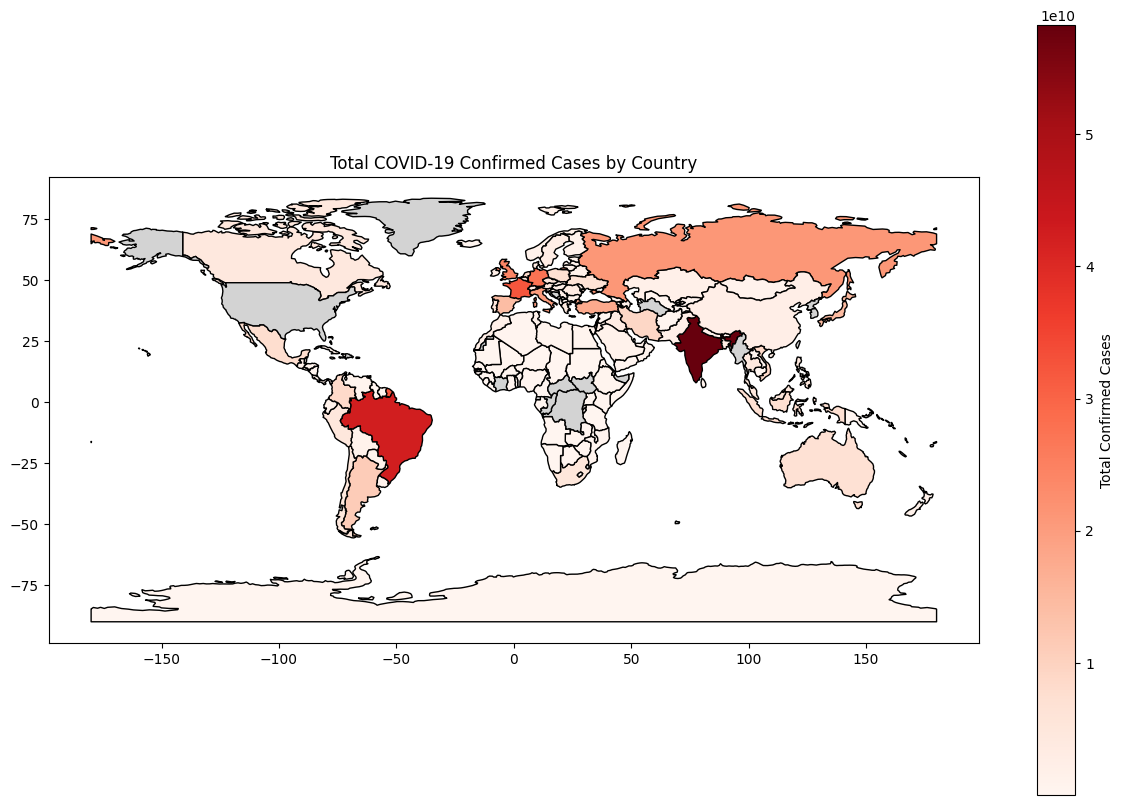

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the Natural Earth dataset from the correct source
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Step 2: Merge COVID-19 data with the world map
merged = world.merge(covid_gdf_country, left_on="NAME", right_on="Country/Region", how="left")
# Ensure the merged GeoDataFrame uses the correct geometry column
merged = merged.set_geometry("geometry_x")  # Or "geometry_y" if that's the correct one

# Step 3: Plot the map again
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    ax=ax,
    column="total_cases",  # Color by total cases
    cmap="Reds",           # Red color scale
    legend=True,
    legend_kwds={"label": "Total Confirmed Cases"},
    missing_kwds={"color": "lightgrey", "label": "No Data"},  # Color for missing data
    edgecolor="black"
)

plt.title("Total COVID-19 Confirmed Cases by Country")
plt.show()
